# Analysis

1. Merge Data
2. Correlation Analysis
3. Multivariate Analysis
5. Dimensionality Reduction

## 1. Merge Patient Data and Gene Expression Data

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
#Import data
df_Patient = pd.read_csv('df_Patient_working')

df_Patient.shape

(62, 9)

In [183]:
#Import data
df_GeneEx = pd.read_csv('df_GeneEx_working')

df_GeneEx.shape

(62, 1936)

In [184]:
#merge file
df_merge = pd.merge(df_Patient, df_GeneEx, how='inner', on='ID_REF')
df_merge

,ID_REF,Age_Years,Dukes_Stage,Gender,Location,DFS_Months,DFS_Event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [185]:
#copy working file to preserve the original file
df_merge_working = df_merge.copy(deep=True)
df_merge_working

,ID_REF,Age_Years,Dukes_Stage,Gender,Location,DFS_Months,DFS_Event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


## 2. Correlation Analysis

### 2.1 Correlation analysis of expression levels of different genes
Correlation coefficients (r) between the expression levels of different genes are calculated. The pairs of genes with r > 0.8 are visualized using a heatmap.

In [186]:
# Calculate the pairwise Pearson correlation matrix
correlation_matrix = df_merge_working.iloc[:, 9:].corr(method='pearson')
correlation_matrix.head(5)

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
117_at,1.000000,-0.099369,0.080373,0.009265,-0.022102,-0.002092,-0.143740,0.273592,0.413378,0.011632,...,-0.066865,-0.219184,-0.041823,0.005219,0.296110,0.139806,-0.101631,0.092978,0.971157,0.141863
1007_s_at,-0.099369,1.000000,0.151216,0.140696,-0.296744,-0.132789,0.170456,-0.121127,-0.335551,-0.027116,...,0.193074,-0.233755,0.076640,-0.002627,-0.012590,0.058515,-0.098946,0.190639,-0.157949,0.054757
1053_at,0.080373,0.151216,1.000000,0.108447,-0.094176,-0.340061,-0.176444,0.080547,-0.118642,0.153022,...,0.259641,-0.033861,0.250227,0.404327,0.201963,-0.028078,-0.231881,-0.092918,0.030052,-0.168225
121_at,0.009265,0.140696,0.108447,1.000000,-0.115394,0.005294,0.043071,-0.053253,-0.015794,0.029867,...,0.175020,-0.217348,0.223074,-0.120765,0.287179,-0.066679,-0.076441,-0.033876,-0.046542,-0.102980
1255_g_at,-0.022102,-0.296744,-0.094176,-0.115394,1.000000,-0.043166,-0.160460,0.059511,0.089073,-0.008238,...,-0.107441,0.067670,-0.229011,-0.323087,-0.048563,-0.183211,0.197362,-0.000196,0.050985,0.080301


In [187]:
# Set the threshold for correlation coefficient
r_threshold = 0.8

# Extract gene pairs with correlation greater than the threshold
high_correlation_genes = []
individual_genes_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > r_threshold:
            gene_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j])
            high_correlation_genes.append(gene_pair)
            individual_genes_list.append(correlation_matrix.columns[i])
            individual_genes_list.append(correlation_matrix.columns[j])

# Create a DataFrame with highly correlated gene pairs
column_list = ['Gene_1', 'Gene_2', 'Correlation_coefficient']
df_high_correlation_genes = pd.DataFrame(high_correlation_genes, columns=column_list)
df_high_correlation_genes.sort_values(by=['Correlation_coefficient'], ascending=False)

,Gene_1,Gene_2,Correlation_coefficient
37,1553185_at,1553186_x_at,0.993569
21,1552502_s_at,1554897_s_at,0.981540
12,1552348_at,1552349_a_at,0.978361
40,1553569_at,1553570_x_at,0.976309
45,1553994_at,1553995_a_at,0.975759
...,...,...,...
30,1552807_a_at,1553043_a_at,0.807875
10,1552316_a_at,1553906_s_at,0.807789
33,1552929_at,1553924_at,0.804298
35,1553043_a_at,1554899_s_at,0.803498


<Axes: xlabel='1553185_at', ylabel='1553186_x_at'>

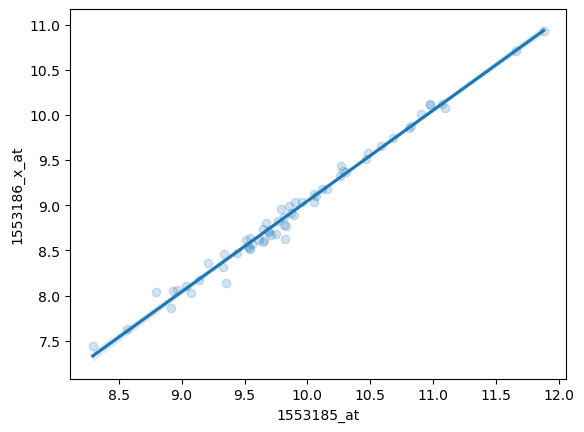

In [188]:
#scatter plot the relationship between gene expressin values of 1553185_at and 1553186_x_at
sns.regplot(data=df_merge_working, x="1553185_at", y="1553186_x_at", fit_reg=True, scatter_kws={"alpha": 0.2})

In [189]:
print(individual_genes_list)

['117_at', '213418_at', '1405_i_at', '1552316_a_at', '1405_i_at', '1554240_a_at', '1552263_at', '1552264_a_at', '1552288_at', '1552289_a_at', '1552309_a_at', '1554007_at', '1552309_a_at', '1554127_s_at', '1552315_at', '1552316_a_at', '1552315_at', '1552318_at', '1552316_a_at', '1552318_at', '1552316_a_at', '1553906_s_at', '1552316_a_at', '1554240_a_at', '1552348_at', '1552349_a_at', '1552365_at', '1552367_a_at', '1552368_at', '1552929_at', '1552368_at', '1553138_a_at', '1552368_at', '1553321_a_at', '1552368_at', '1553924_at', '1552386_at', '1552732_at', '1552389_at', '1552390_a_at', '1552502_s_at', '1554895_a_at', '1552502_s_at', '1554897_s_at', '1552532_a_at', '1553989_a_at', '1552612_at', '1552613_s_at', '1552621_at', '1552622_s_at', '1552701_a_at', '1552703_s_at', '1552789_at', '1552790_a_at', '1552799_at', '1554274_a_at', '1552799_at', '1554384_at', '1552799_at', '1554385_a_at', '1552807_a_at', '1553043_a_at', '1552807_a_at', '1554240_a_at', '1552929_at', '1553321_a_at', '1552929_a

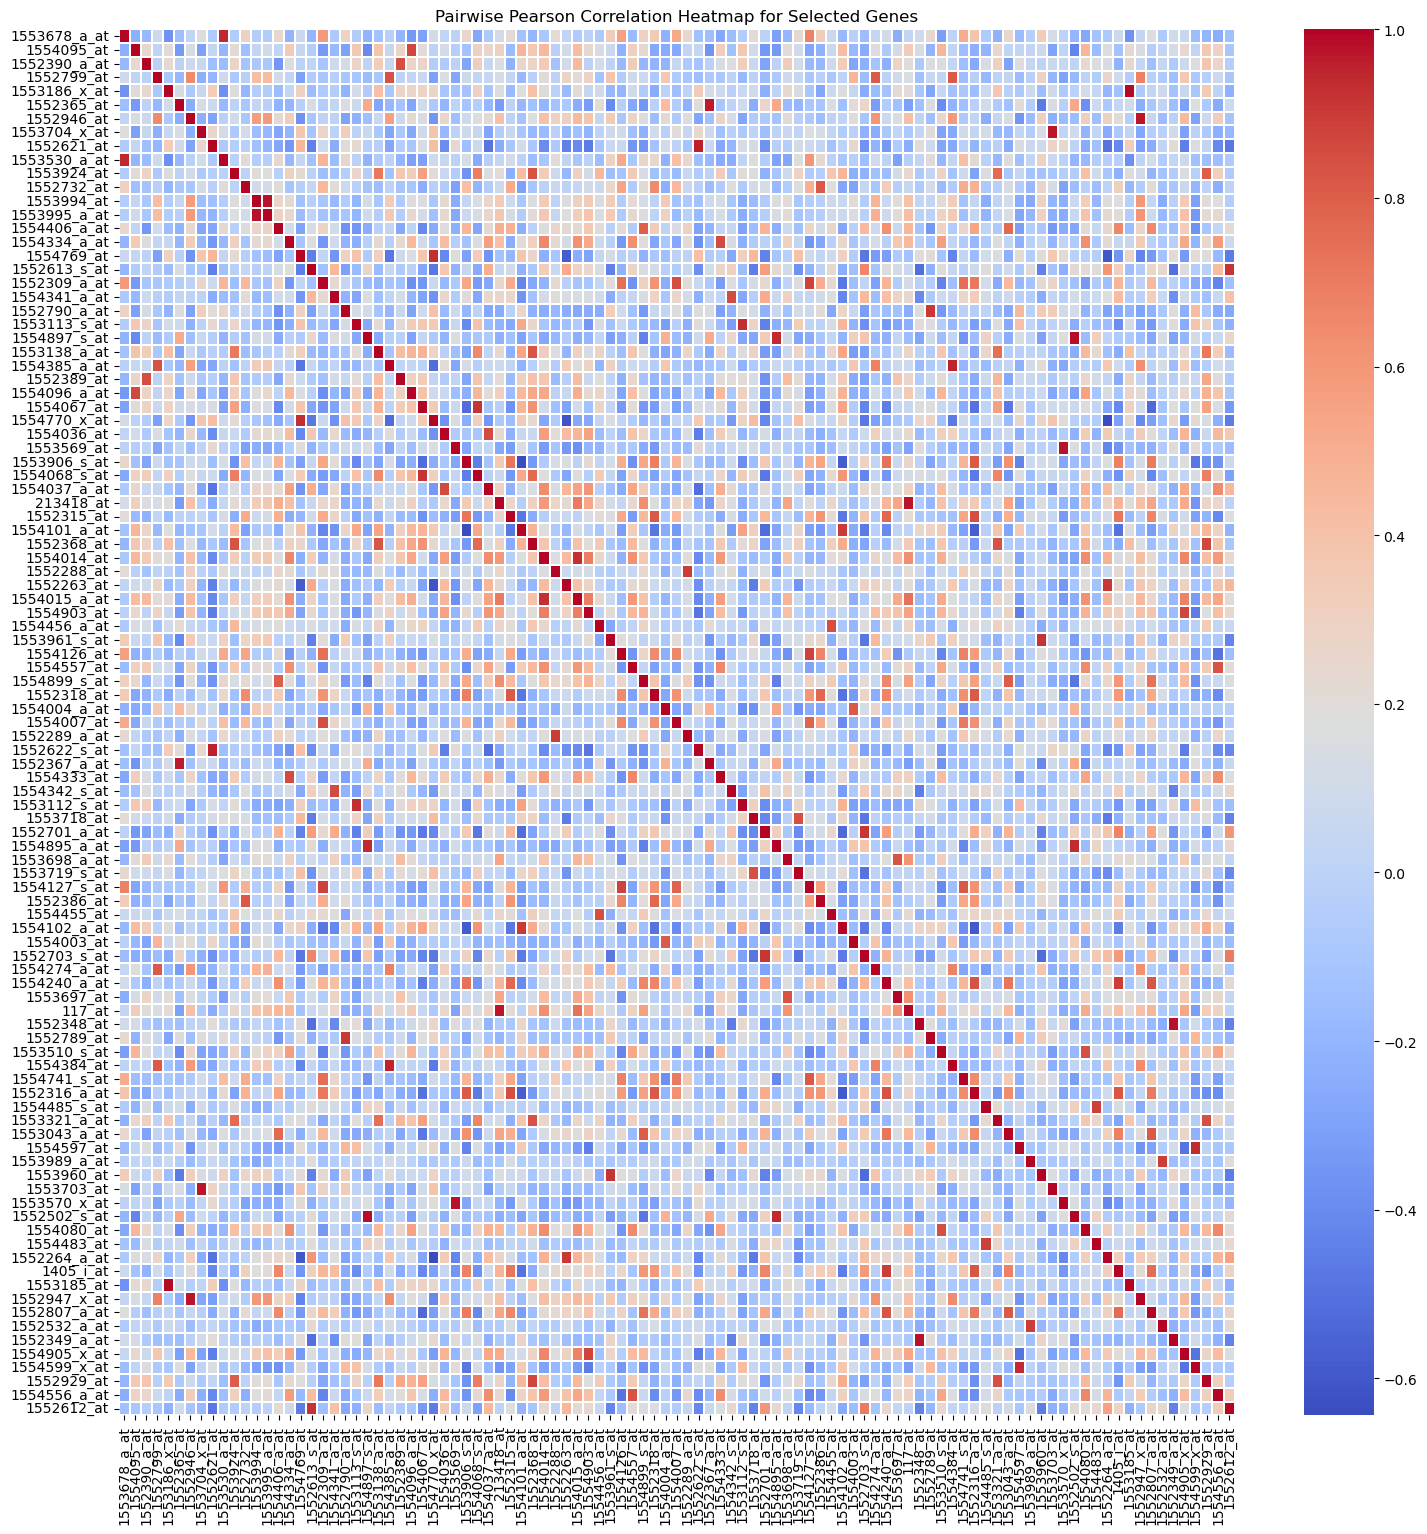

In [190]:
# Extract unique genes from individual_genes_list
unique_genes = list(set(individual_genes_list))

# Extract the relevant rows and columns from the correlation matrix
selected_correlation_matrix = correlation_matrix.loc[unique_genes, unique_genes]

# Plot heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(selected_correlation_matrix, annot=None, cmap='coolwarm', fmt='.2f', linewidths=0.05, xticklabels=True, yticklabels=True)
plt.title('Pairwise Pearson Correlation Heatmap for Selected Genes')
plt.show()

### 2.2 Correlation analysis of expression levels of different genes and Disease-Free Survival (DFS) months

In [191]:
import pandas as pd
from scipy.stats import pearsonr

def calculate_correlation(variable1, variable2):

    """Calculate correlation coefficient and p-value between two variables

    Parameters:
    - varible1: Name of the variable 1 column
    - varible2: Name of the variable 2 column

    Returns:
    - correlation_coefficient: Pearson correlation coefficient
    - p_value: p-value  """
    
    correlation_cofficient, p_value = pearsonr(varible1, variable2)
    return correlation_cofficient, p_value

In [192]:
#Extract gene expression and DFS columns
geneEx_columns = df_merge_working.iloc[: , 9:]
DFS_Months_column = df_merge_working['DFS_Months']

#Make a list of genes with r > 0.8 and p-value < 0.05
significant_genes = []

for gene in geneEx_columns.columns:
    correlation_cofficient, p_value = pearsonr(geneEx_columns[gene], DFS_Months_column)
    if abs(correlation_cofficient) > 0.8 and p_value < 0.05:
        significant_genes.append(gene)
    
print('List of genes that correlate with DFS months with r > 0.8 and a p-value < 0.05:')
print(significant_genes)

List of genes that correlate with DFS months with r > 0.8 and a p-value < 0.05:
[]


## 3. Multivariate Analysis
Multivariate analysis using variables such as Dukes stage, Location, Gender, and DFS event will be performed. During exploratory data analysis (EDA) of the gene expression data, we utilized the Shapiro-Wilk test to assess normality. The test confirmed that the data follows a normal distribution. Now, the next step is to perform one-way ANOVA to examine the mean differences between groups, where each gene serves as a grouping variable. This analysis will help us understand if there are statistically significant differences in gene expression levels across the various groups.

### 3.1.  Mean gene expression distribution across groups

### Location (Colon, Left, Rectum, and Right)

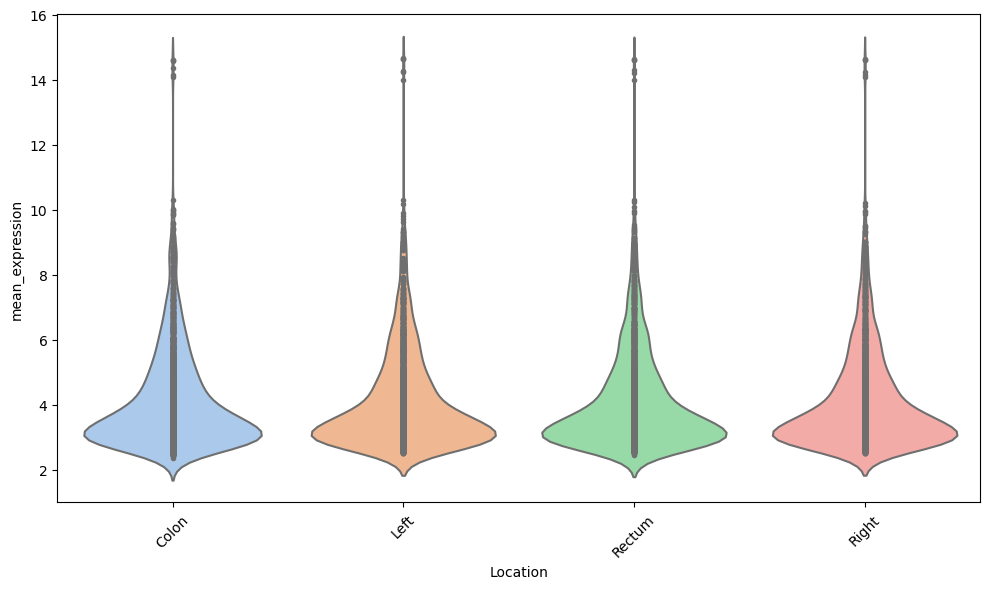

In [216]:
from meanGeneEx_distribution import meanGeneEx_distribution 
meanGeneEx_distribution(df_merge_working, 'Location', 4)

### Dukes stage (A, B, C, and D)

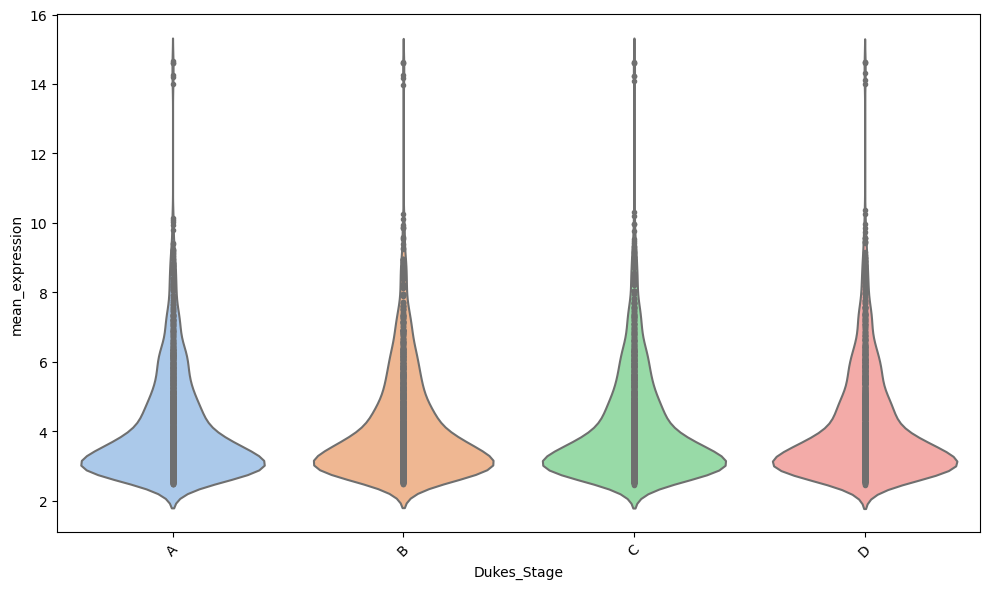

In [217]:
 meanGeneEx_distribution(df_merge_working, 'Dukes_Stage', 2)

### Genders

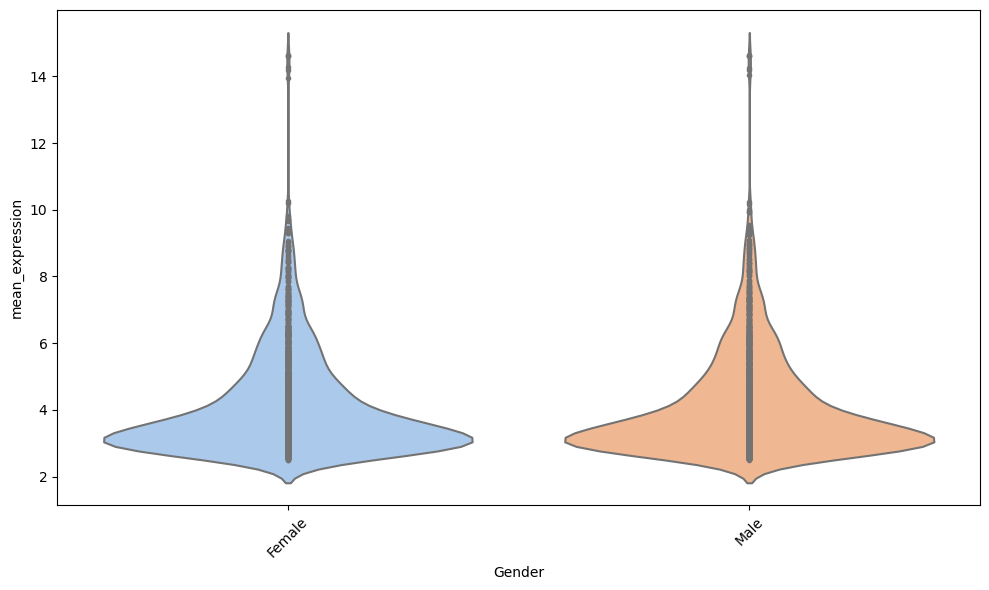

In [218]:
 meanGeneEx_distribution(df_merge_working, 'Gender', 3)

### 3.4. Statistical comparing gene expression across groups

Perform one-way ANOVA for each gene and a subgroup by the location column in the DataFrame with the threshold < 0.01.

### Locations (Colon, Left, Rectum, and Right)

In [253]:
from geneEx_ANOVA import geneEx_ANOVA

significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Location', 0.01)
print (significant_genes)

['1431_at', '1552674_at', '1552813_at', '1552852_a_at', '1552857_a_at', '1553028_at', '1553071_a_at', '1553081_at', '1553177_at', '1553295_at', '1553403_at', '1554017_at', '1554106_at', '1554479_a_at']


In [254]:
df_ANOVA_all.sort_values(by='p_value')

,Gene,f_statistic,p_value
590,1553081_at,7.800277,0.000185
659,1553177_at,5.283142,0.002734
1597,1554479_a_at,5.160819,0.003134
745,1553295_at,5.131381,0.003239
425,1552852_a_at,5.128237,0.003250
...,...,...,...
1489,1554328_at,0.016353,0.997118
189,1552522_at,0.014976,0.997471
277,1552649_a_at,0.014018,0.997707
48,1552310_at,0.012721,0.998016


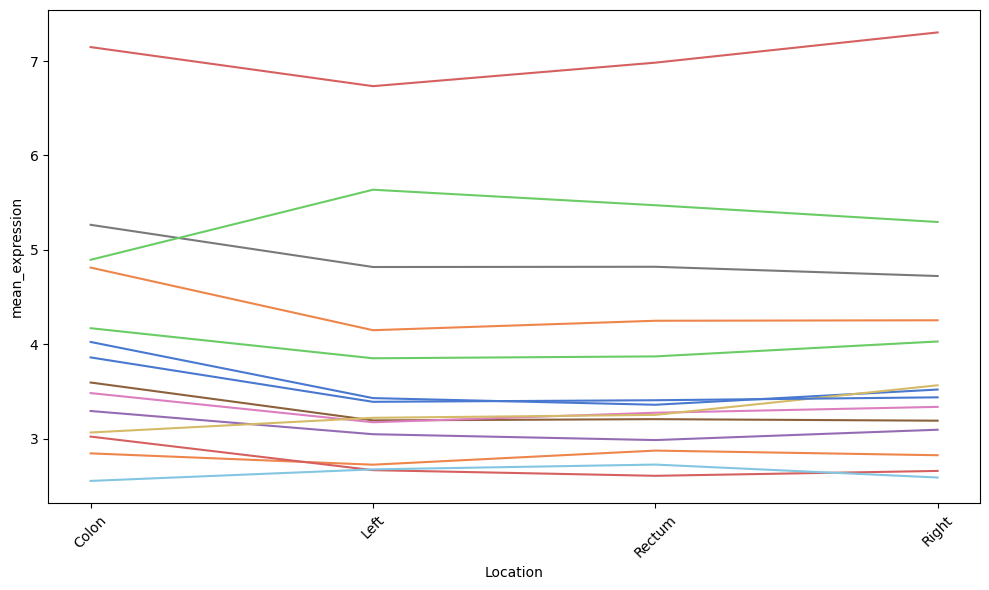

In [255]:
dx = df_merge_working.iloc[:, [4] + list(range(9, len(df_merge_working.columns)))].groupby('Location').mean()
dx_sigGenes = dx[significant_genes] 

# Reset index to make 'Location' a column again
dx_sigGenes_reset_index = dx_sigGenes.reset_index()

# Reshape the DataFrame for Seaborn
dx_melted = pd.melt(dx_sigGenes_reset_index, id_vars=['Location'], var_name='gene', value_name='mean_expression')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dx_melted, x='Location', y='mean_expression', hue='gene', palette="muted", legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dukes stage (A, B, C, and D)

In [248]:
significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Dukes_Stage', 0.01)
print (significant_genes)

['1553070_a_at', '1553111_a_at', '1553351_at', '1553403_at', '1553584_at', '1553608_a_at', '1553611_s_at', '1553815_a_at', '1554430_at', '1554577_a_at', '1554690_a_at']


### Genders

In [250]:
significant_genes, df_ANOVA_all = geneEx_ANOVA(df_merge_working, 'Gender', 0.01)
print (significant_genes)

['1552980_at', '1553079_at', '1553685_s_at', '1554155_at', '1554235_at', '1554468_s_at', '1554549_a_at']
